In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/feb_21-25.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(22732, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-02-25,1232100444354138114,#Sagarmediainc \n\nSlovakia effectively bans I...,"['Sagarmediainc', 'Gaza']",0.0,"{'country_code': 'in', 'state': 'Delhi'}",sagarmediainc slovakia effectively bans islam ...
1,2020-02-25,1232104320675368960,You’re Likely to Get the Coronavirus\nhttps://...,[],0.0,"{'country_code': 'in', 'state': 'Karnataka', ...",likely get coronavirus
2,2020-02-25,1232105262468612096,This man! https://t.co/uMegfOscPb,[],0.0,"{'country_code': 'in', 'state': 'West Bengal'...",man !
3,2020-02-25,1232111392800423937,@IPAGE7th @GOT7Official With coronavirus proli...,"['GOT7', 'GOT7DeservesBetter', 'GOT7DeserveBet...",1.0,{'country_code': 'in'},coronavirus proliferation affects got schedule...
4,2020-02-25,1232111425281093632,#NewsAlert | South Korea reports 60 new corona...,['NewsAlert'],4.0,{'country_code': 'in'},newsalert south korea reports new coronavirus ...


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
22727,2020-02-25,1232222499904950274,This is getting scary https://t.co/ySoJRaL5i1,[],0.0,{'country_code': 'in'},getting scary
22728,2020-02-25,1232253862234320896,Our #COVID19 FinTwit thought leadership panel ...,['COVID19'],18.0,"{'country_code': 'in', 'state': 'Maharashtra'...",covid fintwit thought leadership panel podcast...
22729,2020-02-25,1232292860243791872,Drugmaker Moderna is delivering the first expe...,['coronavirus'],32.0,"{'country_code': 'in', 'state': 'Maharashtra'...",drugmaker moderna delivering first experimenta...
22730,2020-02-25,1232334464073764864,⁦⁦@safiranand⁩ coronavirus shall vanish in a f...,['PositiveVibesOnly'],0.0,"{'country_code': 'in', 'state': 'West Bengal'...",coronavirus shall vanish weeks shall go back m...
22731,2020-02-25,1232180416175427586,Joke: Not prepping for Coronavirus\n\nWoke: Pr...,[],3.0,{'country_code': 'in'},joke prepping coronavirus woke prepping corona...


In [ ]:
print(df.shape)
df.isnull().sum()

(22732, 7)


date             0
id               0
text             0
hashtags         0
retweet_count    0
location         0
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    sagarmediainc slovakia effectively bans islam ...
1                               likely get coronavirus
2                                                 man 
3    coronavirus proliferation affects got schedule...
4    newsalert south korea reports new coronavirus ...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

22732


'sagarmediainc slovakia effectively bans islam country forbids mosques greeks vow stop island invaders rockets fired israel israeli warplanes pound gaza amid rising tensions palestinians trump coronavirus control united states'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.534976959228516 secs.


In [ ]:
t_clean[0]

['sagarmediainc',
 'slovakia',
 'effectively',
 'ban',
 'islam',
 'country',
 'forbids',
 'mosque',
 'greeks',
 'vow',
 'stop',
 'island',
 'invader',
 'rocket',
 'fire',
 'israel',
 'israeli',
 'warplane',
 'pound',
 'gaza',
 'amid',
 'rise',
 'tension',
 'palestinian',
 'trump',
 'coronavirus',
 'control',
 'united',
 'state']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

sagarmediainc


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

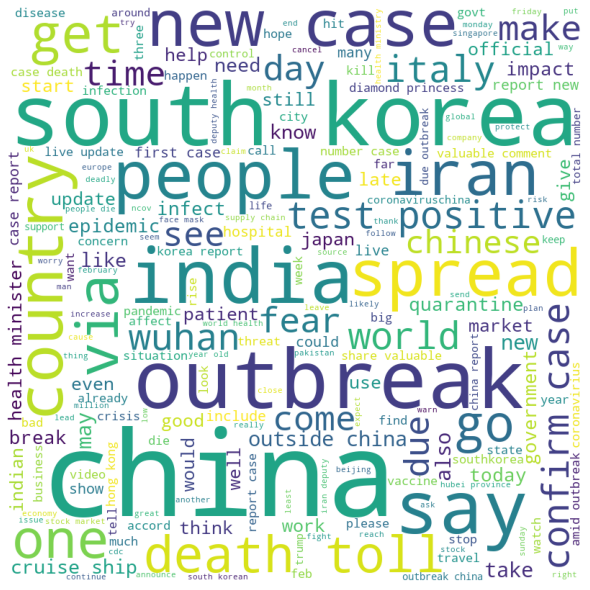

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['sagarmediainc slovakia effectively ban islam country forbids mosque greeks vow stop island invader rocket fire israel israeli warplane pound gaza amid rise tension palestinian trump coronavirus control united state',
 'likely get coronavirus',
 'man',
 'coronavirus proliferation affect get schedule artist business general well feel boy need get contract renewal sound good option get deservesbetter get deservebetter',
 'newsalert south korea report new coronavirus case raise total number case afp news agency']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aamir khan',
 'account critique',
 'account critique fascist',
 'accurate information',
 'accurate information ncov',
 'across asia',
 'across china',
 'across country',
 'across globe',
 'across world',
 'action take',
 'affect many',
 'affect many case',
 'afp news',
 'afp news agency',
 'agency afp',
 'ai iot',
 'air force',
 'air mask',
 'air mask kitty',
 'alert high',
 'alert high level',
 'alert level',
 'allow leave',
 'amb india',
 'amid concern',
 'amid fear',
 'amid outbreak',
 'among new',
 'among new case',
 'another death',
 'answer faqs',
 'answer faqs reveals',
 'around world',
 'artificial intelligence',
 'ask citizen',
 'ask citizen avoid',
 'attack bus',
 'attack bus carry',
 'australia linux',
 'authority say',
 'avoid non',
 'avoid non essential',
 'bad hit',
 'ban flight',
 'ban trade',
 'banknifty trading',
 'banknifty trading stock',
 'bbc news',
 'become dangerous',
 'become dangerous learn',
 'behind closed',
 'behind closed door',
 'best way',
 'best way co

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:death toll,outside china,infection outside,toll china,iran report,global pandemic,infection outside china,report infection,toll rise,death toll china\nTopic 1:health ministry,world health,xi jinping,world health organization,health organization,china wuhan,health emergency,new post,northern italy,president xi\nTopic 2:share valuable comment,share valuable,valuable comment,test treatment,symptoms test,understand precaution,precaution symptoms test,completely share,pls read,treatment pls\nTopic 3:test positive,health minister,public health,look like,china coronavirusupdate,coronavirussymptoms coronavirusinindia,coronavirusupdate coronavirussymptoms,coronavirusupdate coronavirussymptoms coronavirusinindia,china coronavirusupdate coronavirussymptoms,case total\nTopic 4:amid outbreak,supply chain,bus carry,treat patient,new york,patient die,two week,gold price,flight iran,take precaution\nTopic 5:new case,report new,korea report,south korea report,china report,hubei province,south 

In [ ]:
lda.perplexity(tf)

405.8369958745771

In [ ]:
f=open('lda_feb_21-25.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_feb_21-25.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_feb_21-25.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_feb_21-25.pk')
shutil.move("topics_feb_21-25.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_feb_21-25.txt')